In [30]:
import pandas as pd

In [31]:
df = pd.read_csv("../Data/final_data.csv")
df

,height_diff,age_diff,rank_diff,rank_point_diff,seed_diff,exp_diff,h2h_diff,past_wins_diff,ace_diff,df_diff,...,surface_Grass,surface_Hard,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_SF,target
0,-1.704919,-0.324874,-0.692203,-1.233859,0.729958,-0.579618,0.0,-0.285321,-3.165787,-0.181959,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,-0.852460,0.057331,0.346101,0.369681,-0.892171,0.637580,0.0,-0.251754,-0.526555,0.161158,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.000000,1.643481,-0.362984,-0.073141,0.000000,1.333122,0.0,0.251754,0.516790,1.798859,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,1.172132,-0.401315,-0.075973,-0.325160,1.054383,-0.260828,0.0,0.000000,-0.298963,0.237331,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,1.385247,0.210213,0.050649,0.012323,0.000000,0.753504,0.0,-0.033567,1.290651,-0.735491,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33323,-0.319672,-1.127504,-0.244803,-0.052471,-0.000000,-1.854779,0.0,0.016784,-0.451115,0.881378,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
33324,0.532787,0.955512,-0.211037,-0.136345,2.595405,-0.289809,0.0,-0.134269,0.678363,0.886835,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
33325,0.213115,-0.152882,0.008441,0.007155,0.000000,0.144905,0.0,0.000000,-0.335204,-0.242475,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
33326,0.000000,-1.089284,1.890895,0.305682,0.000000,-1.651912,0.0,0.100701,-0.128776,1.598589,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [ ]:
# df = df.drop(['ace_diff', 'df_diff', '1stIn_diff', '1stWon_diff', '2ndWon_diff', 'h2h_diff', 'past_wins_diff'], axis=1)

### Train_test_split

In [32]:
from sklearn.model_selection import train_test_split


X = df.drop('target', axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty=None, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(penalty=None, random_state=42)

In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score



preds = model.predict(X_test)

print(
    'accuracy_score: ',accuracy_score(y_test, preds),
    '\nrecall: ', recall_score(y_test, y_pred=preds),
    '\nprecision: ', precision_score(y_test, y_pred=preds),
    '\nf1: ', f1_score(y_test, preds)
    )

accuracy_score:  0.9317431743174317 
recall:  0.9304162868429049 
precision:  0.931265206812652 
f1:  0.9308405532755738


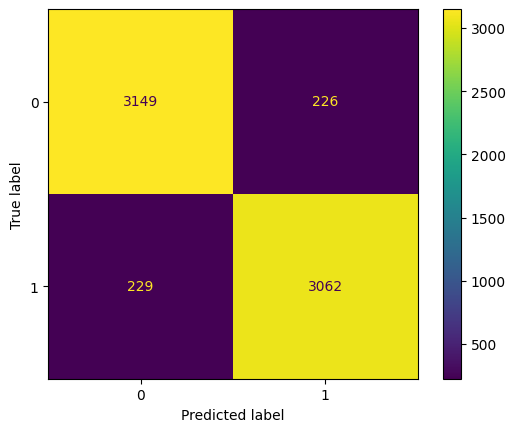

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

_ = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)